# Лабораторная работа №2
## Поэлементные преобразования изображений

1. Считать цветное rgb изображение.
2. Преобразовать изображение в градации серого.
3. Написать функцию расчета нормированной гистограммы.
4. Написать функцию реализации поэлементной обработки изображения.

> Функцию вида fun(Image, prepfun)  
Где prepfun  - конкретная функция препаирования, заданная в том или ином виде.

5. Рассчитать функцию эквализации гистограммы изображения. Применить её к изображению с помощью функции поэлементной обработки.
  *   Вход: изображение из пункта 2.
  *   Вывод: входное и результирующие изображение, их гистограммы и интергральные функции распределения соответственно.
6. Осуществить препарирование изображения с заданной препарирующей функцией.
  *   Вход: изображение из пункта 2.
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно. График препарирующий функции.
  *   Пороги в препарирующей функции выбирать самостоятельно.

   
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> По всем вопросам писать в ЛС в tg ***volfgunus***




Ссылки на полезные ресурсы:

1.   [Методичка по поэлементным преобразованиям](http://repo.ssau.ru/bitstream/Metodicheskie-ukazaniya/Poelementnye-preobrazovaniya-izobrazhenii-Elektronnyi-resurs-elektron-metod-ukazaniya-k-lab-rabote-1-53793/1/%d0%a1%d0%b5%d1%80%d0%b3%d0%b5%d0%b5%d0%b2%20%d0%92.%d0%92.%20%d0%9f%d0%be%d1%8d%d0%bb%d0%b5%d0%bc%d0%b5%d0%bd%d1%82%d0%bd%d1%8b%d0%b5%20%d0%bf%d1%80%d0%b5%d0%be%d0%b1%d1%80%d0%b0%d0%b7%d0%be%d0%b2%d0%b0%d0%bd%d0%b8%d1%8f.pdf)
2.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)


# Варианты задания

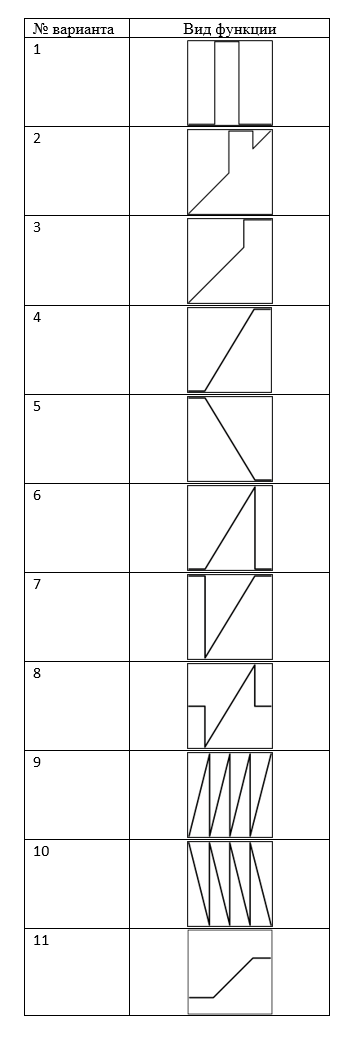

# Контрольные темы

1. Изображение. Основные понятия и определения. Представление изображений
в компьютере.
2. Гистограмма. Основные понятия.
3. Поэлементные преобразования изображений.
4. Пороговая обработка изображений.
5. Линейное контрастирование.
6. Преобразования гистогамм. Эквализация.
7. Препарирование изображений. Препарирующая функция.

Вариант работы: 7



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Считать цветное rgb изображение.
2. Преобразовать изображение в градации серого.

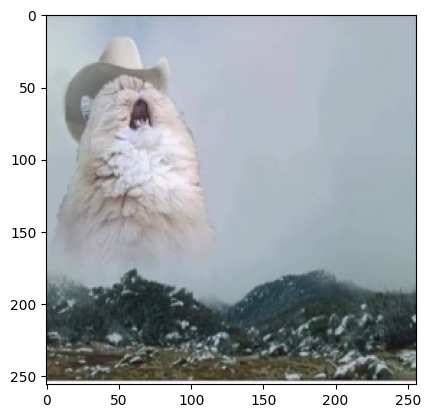

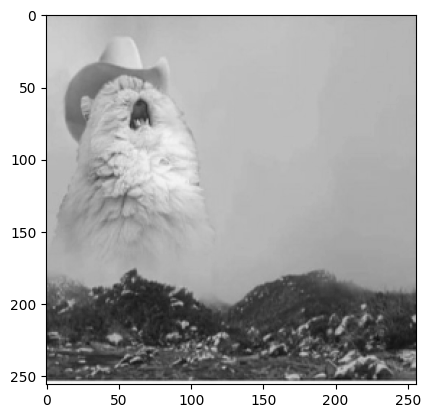

In [2]:
def normalize(image):
    return (255 * ((image-image.min()) / (image.max()-image.min()))).astype(np.uint8)

def show_image(image):
    # image = normalize(image).astype('uint8')
    
    plt.figure()
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

def to_grayscale(image):
    image_gray = np.zeros([image.shape[0],image.shape[1]], dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_gray[i][j] = 0.2989*image[i,j,0]+0.5870*image[i,j,1]+0.1140*image[i,j,2]
    return image_gray

image_orig = cv2.resize(cv2.imread('img3.png',1).astype('uint8')[:,:,::-1], (256,256))
show_image(image_orig)
image_gray = to_grayscale(image_orig)
show_image(image_gray)

3. Написать функцию расчета нормированной гистограммы.

In [3]:
def show_hist(hist, graph=0, drawGraph = False):        
    plt.figure()
    if drawGraph:
        plt.plot(graph)
    plt.bar(range(len(hist)), hist.tolist(), color="red")
    plt.show()

def show_graph(graph):       
    plt.figure()
    plt.plot(graph)
    plt.show()

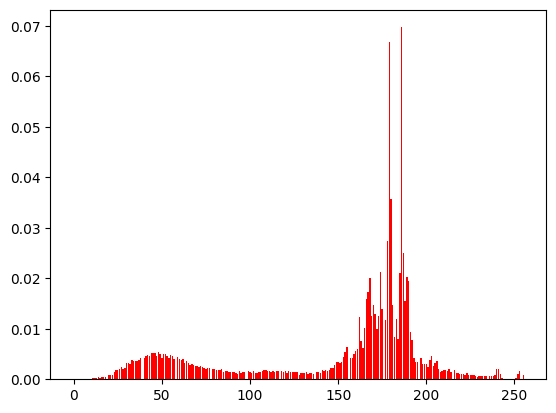

In [4]:
def norm_hist(image):
    image_norm = normalize(image)
    hist = np.zeros(256, dtype=float)
    N = image.shape[0]*image.shape[1]
    keys,vals = np.unique(image_norm, return_counts=True)
    
    for key, value in zip(keys, vals):
        hist[key] = value
    return hist/N

hist = norm_hist(image_gray)
show_hist(hist)

4. Написать функцию реализации поэлементной обработки изображения.

In [5]:
def pixel_conversion(image,func):
    image_new = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_new[i,j] = func(image[i,j])
    return image_new

5. Рассчитать функцию эквализации гистограммы изображения. Применить её к изображению с помощью функции поэлементной обработки.
  *   Вход: изображение из пункта 2.
  *   Вывод: входное и результирующие изображение, их гистограммы и интергральные функции распределения соответственно.

In [6]:
def get_integral_function(image):
    hist = norm_hist(image)
    F = np.cumsum(hist)
    return F

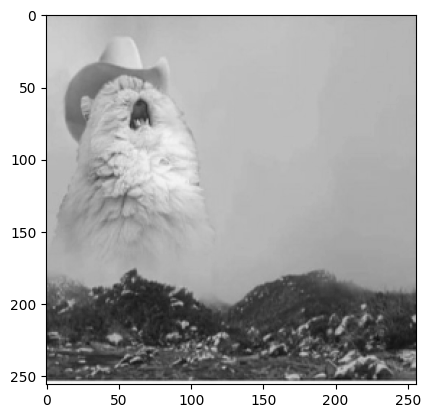

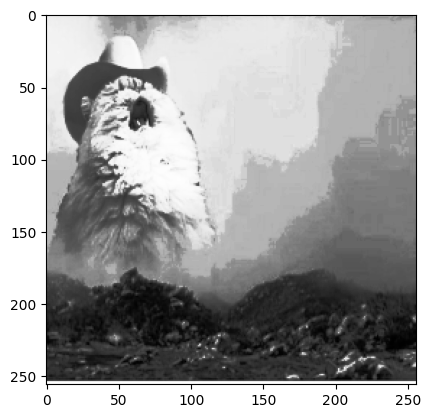

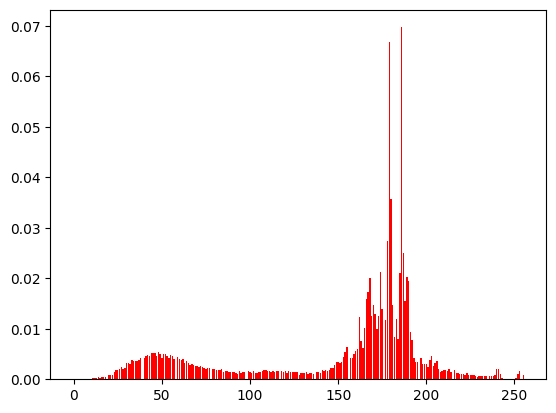

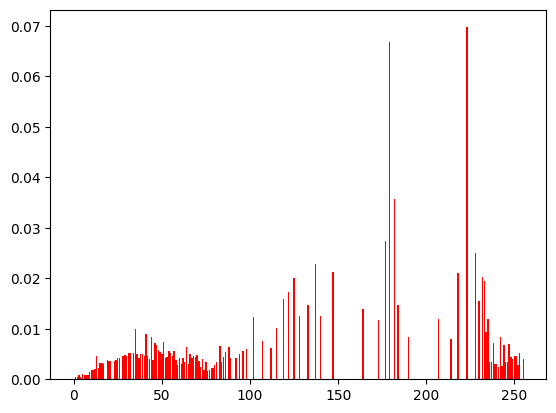

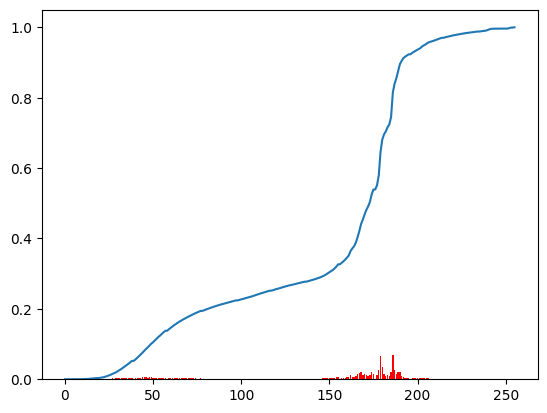

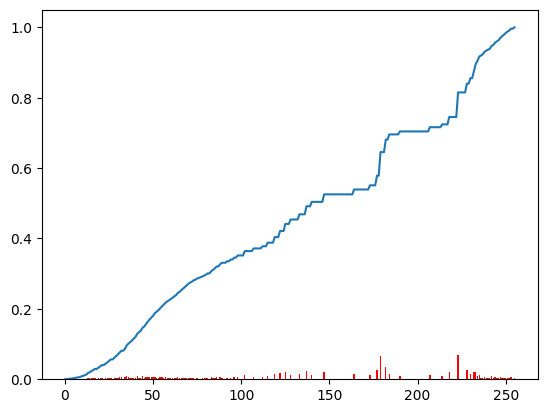

In [7]:
def equalize_gist_of_image(image,g_min,g_max):
    F = get_integral_function(image)
    g = np.zeros_like(F, dtype=float)
    for i in range(256):
        g[i] = ((g_max-g_min)*F[i]+g_min)
    
    image_new = pixel_conversion(image,lambda x:g[x])
    return image_new


image_eq = equalize_gist_of_image(image_gray,0,255)
show_image(image_gray)
show_image(image_eq)
show_hist(norm_hist(image_gray))
show_hist(norm_hist(image_eq))
show_hist(norm_hist(image_gray), get_integral_function(image_gray), True)
show_hist(norm_hist(image_eq), get_integral_function(image_eq), True)

6. Осуществить препарирование изображения с заданной препарирующей функцией.
  *   Вход: изображение из пункта 2.
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно. График препарирующий функции.
  *   Пороги в препарирующей функции выбирать самостоятельно.
  
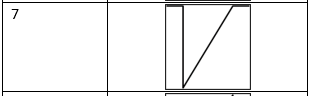


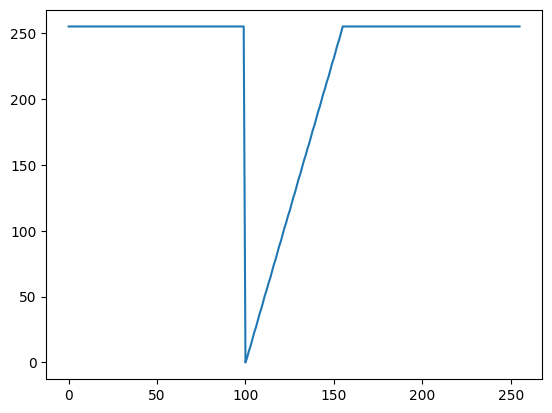

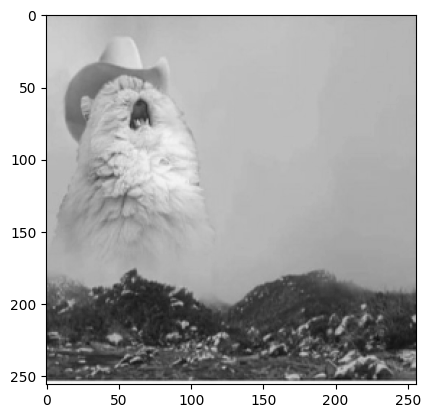

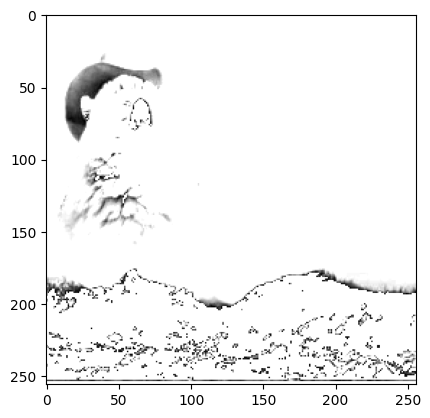

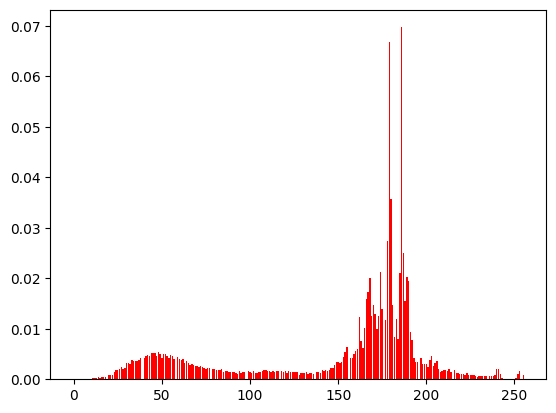

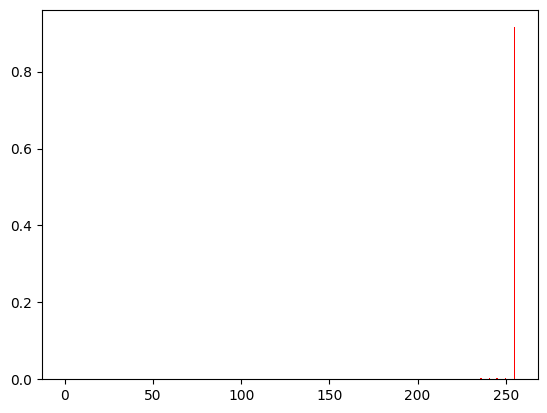

In [8]:
def prep_image(image,g_min,g_max):
    g = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i < g_min:
            g[i] = 255
        elif i > g_max:
            g[i] = 255
        else:
            g[i] = int(255 * ((i-g_min) / (g_max-g_min)))
    show_graph(g)
    
    image_new = pixel_conversion(image,lambda x:g[x])
    return image_new

image_prep = prep_image(image_gray,100,155)
show_image(image_gray)
show_image(image_prep)
show_hist(norm_hist(image_gray))
show_hist(norm_hist(image_prep))